In [33]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lbc.experiments.runner import SCENARIO_DEFAULT
from lbc.analysis import run_analysis

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
%autoreload 2
from lbc.experiments import DPCRunner, MPCOneShotRunner

In [35]:
%autoreload
from configs import make_configs

In [41]:
configs = make_configs("RTP", 3)
config = configs["DPC"]
config

{'name': 'DPC-RTP-test',
 'policy_type': 'DPC',
 'batch_size': 3,
 'dr_program': 'RTP',
 'scenario_config': {'start_time': '00:05:00',
  'end_time': '23:55:00',
  'zone_temp_init_mean': 26.0,
  'dr_program': <lbc.demand_response.DemandResponseProgram at 0x7f95a288e6d0>},
 'policy_config': {'model_config': {'hidden_dim': 128, 'num_intervals': 48},
  'lr': 0.01,
  'num_epochs': 1000},
 'training': True,
 'dry_run': 0,
 'results_dir': './_scratch'}

In [26]:
#runner = MPCOneShotRunner(**c)
runner = DPCRunner(**config)
loss, rollout, meta = runner.run()

INFO:/Users/dbiagion/gitrepos/learning-building-control/lbc/policies/mpc.py:one-shot: batch sample (1/3)
INFO:/Users/dbiagion/gitrepos/learning-building-control/lbc/policies/mpc.py:one-shot: batch sample (2/3)
INFO:/Users/dbiagion/gitrepos/learning-building-control/lbc/policies/mpc.py:one-shot: batch sample (3/3)
INFO:lbc.experiments.runner:[MPCOneShot-RTP-test] bsz=3, loss=3.555, time=30.7
INFO:lbc.experiments.runner:saved to ./_scratch/MPCOneShot-RTP-test.p


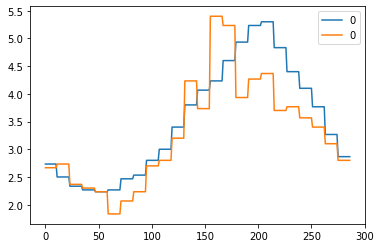

In [28]:
fig, ax = plt.subplots()
_ = pd.DataFrame(rollout.data["predicted_energy_price"].mean(-1)).plot(ax=ax)
_ = pd.DataFrame(rollout.data["energy_price"].mean(-1)).plot(ax=ax)

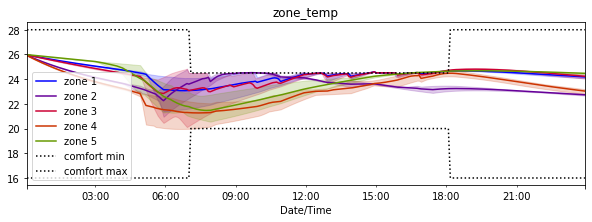

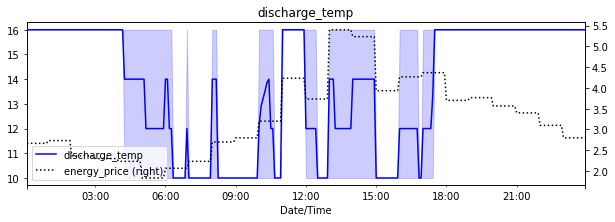

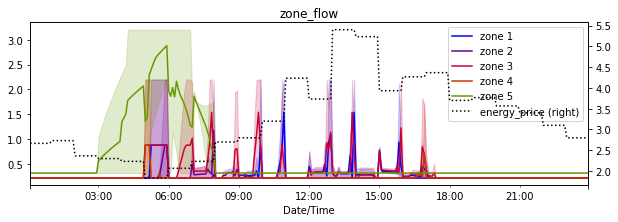

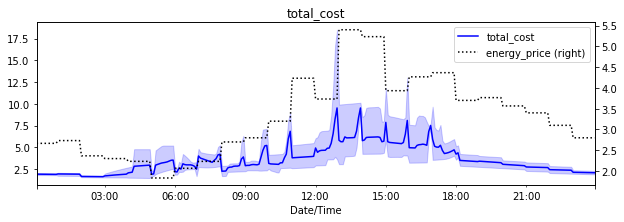

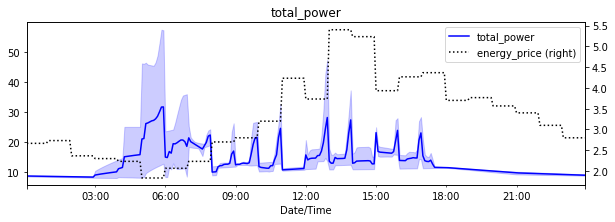

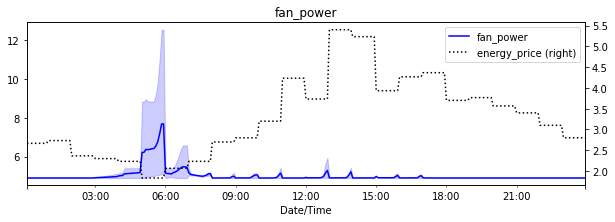

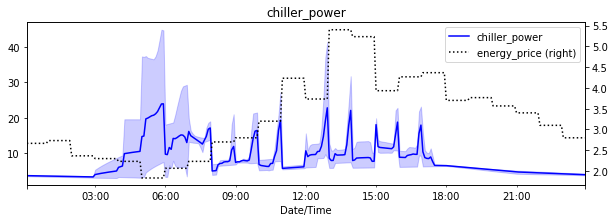

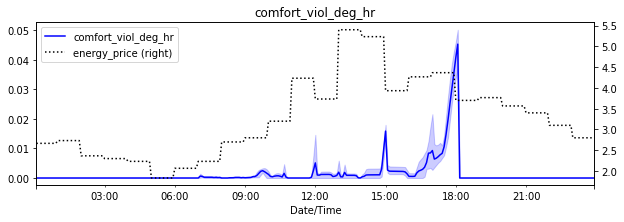

In [38]:
_, df, figs = run_analysis(rollout, "RTP", secondary=True)